## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read in data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('../../../titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(columns=cat_feat, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore continuous features

In [5]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Since we know that `Survived` is a binary feature, we can use the mean to tell us the percentage of people that survived.

We have 3 ordinal features:
- `Pclass`
- `SibSp`
- `Parch`

A feature is considered ordinal when there is more than one value but only a few unique values

In [6]:
# Understand which features might be strong indicators of whether someone survived or not
# We can do this by the using `groupby` on the two levels of survival and generate the average values of the other features at those 2 levels of the target feature
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


`Fare` and `Pclass` seem to be pretty good indicators as to whether someone survived or not

In [8]:
# Check for missing values by using groupby with the ages of passanges
titanic.groupby(titanic.Age.isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


We can see that `Age` does have some missing values and they are likely "missing at random"

### Plot continuous features

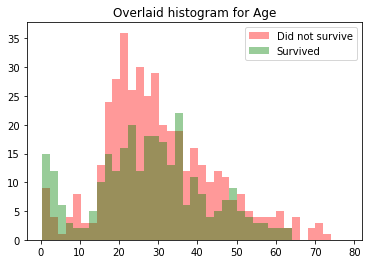

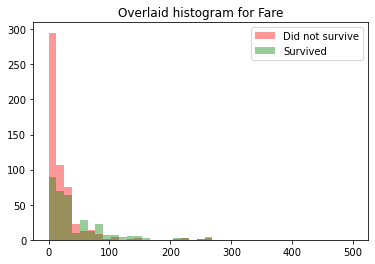

In [10]:
# Plot an overlayed histogram
# Iterate through list of featrues
for i in ['Age', 'Fare']:
#     Create list for each value in Survived that is not null
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    # Set the values for the bins
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    # Create both histograms
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
#     Add legend labels and title
    plt.legend(['Did not survive', 'Survived'])
    plt.title(f'Overlaid histogram for {i}')
    plt.show()

<Figure size 432x288 with 0 Axes>

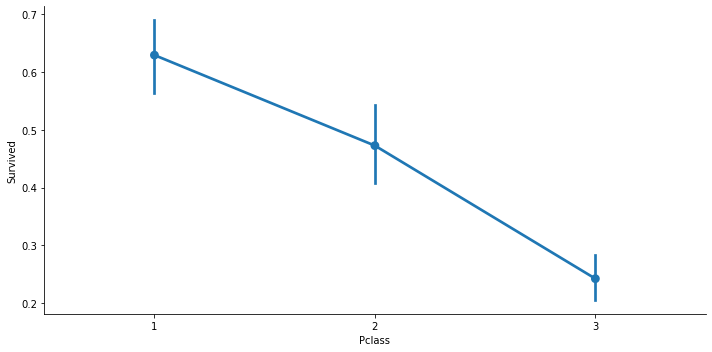

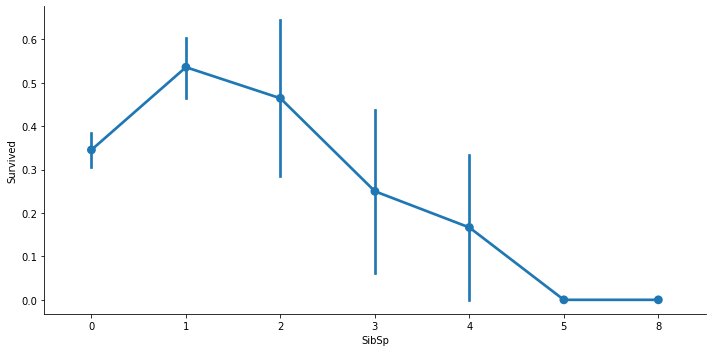

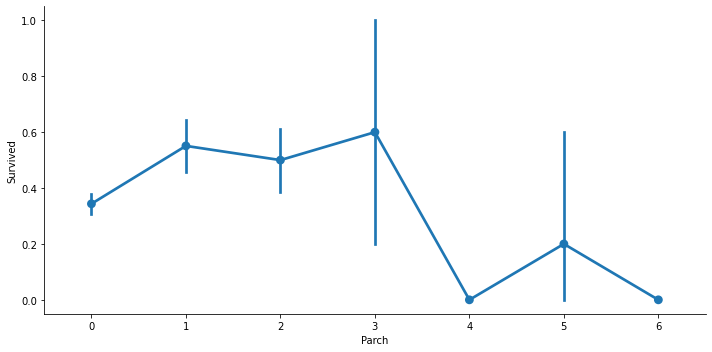

In [13]:
# Plot the categorical values using a categorical plot
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,);

We can infer that the `SibSp` and `Parch` features are all having to do with family members on board. So we can merge the values of these two columns into one column for the family count

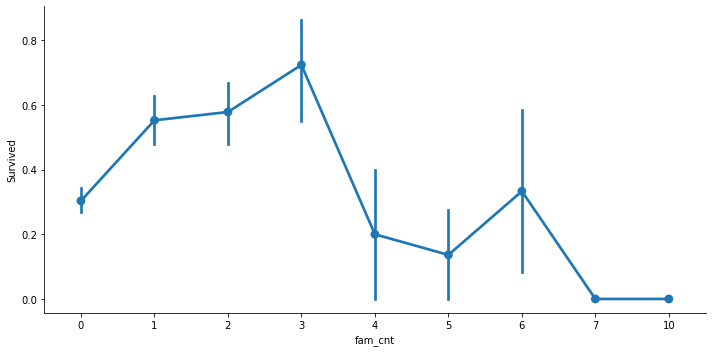

In [14]:
# Create a new featrue with count of all family on board
titanic['fam_cnt'] = titanic['SibSp'] + titanic['Parch']

# Plot using the categorical plot 
sns.catplot(x='fam_cnt', y='Survived', data=titanic, kind='point', aspect=2,);

It is important to note that if you can combine two feature or more and still maintain the same or very similar pattern, it is usually a good idea to do this.